# Workflow


## Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import filpy
from filpy import cube_stuff as cb


Package Dir: /home/bernardo/Scrivania/FISICA/ASTROFISICA/&Argomenti/Filaments/filaments_strc_param/filpy
Project Dir: /home/bernardo/Scrivania/FISICA/ASTROFISICA/&Argomenti/Filaments/filaments_strc_param


/home/bernardo/Scrivania/FISICA/ASTROFISICA/&Argomenti/Filaments/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## IRAM

### Load data

In [2]:
from filpy import IR_PATHS

IR60_HDUL, IR60_DATA   = filpy.get_data_fit(IR_PATHS[0],display_plots=False) 
IR100_HDUL, IR100_DATA = filpy.get_data_fit(IR_PATHS[1],display_plots=False) 


Filename: /home/bernardo/Scrivania/FISICA/ASTROFISICA/&Argomenti/Filaments/filaments_strc_param/MBM40/IR/IRAS-60_RA+DEC_242.64+21.822.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     133   (1000, 1000)   float32   
 - HEADER -
SIMPLE  =                    T / Written by SkyView Thu Oct 17 10:19:07 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                 1000 / Width of image                                 
NAXIS2  =                 1000 / Height of image                                
CRVAL1  =   242.64199999999994 / Reference longitude                            
CRVAL2  =               21.822 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                  

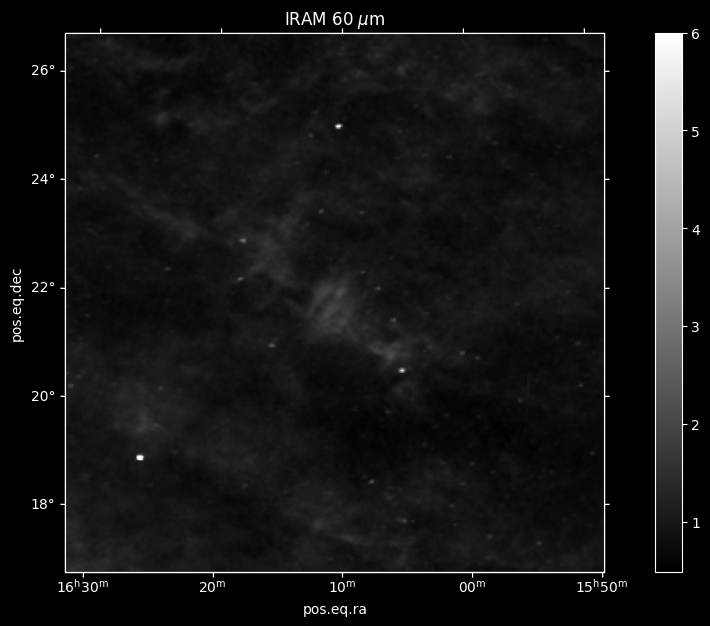

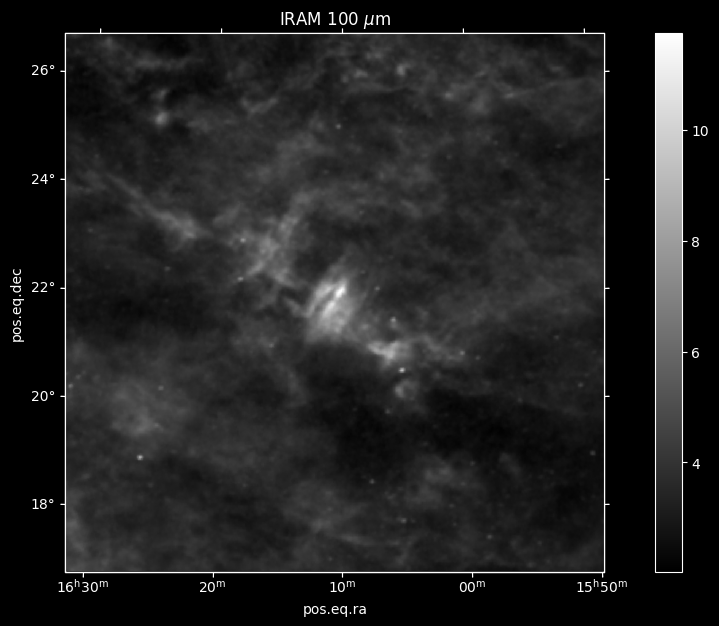

In [3]:
ir60_wcs = cb.WCS(IR60_HDUL[0].header)
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111,projection=ir60_wcs)
ax.set_title('IRAM 60 $\\mu$m')
ir_img = ax.imshow(IR60_DATA,cmap='gray',vmax=6)
plt.colorbar(ir_img)
# ax.plot(SkyCoord(),'xr',transform=ax.get_transform("world"))
plt.show()

ir100_wcs = cb.WCS(IR100_HDUL[0].header)
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111,projection=ir100_wcs)
ax.set_title('IRAM 100 $\\mu$m')
ir_img = ax.imshow(IR100_DATA,cmap='gray')
plt.colorbar(ir_img)
plt.show()



### Sobel filter

Apply the Sobel filter to the image in order to magnify the edges

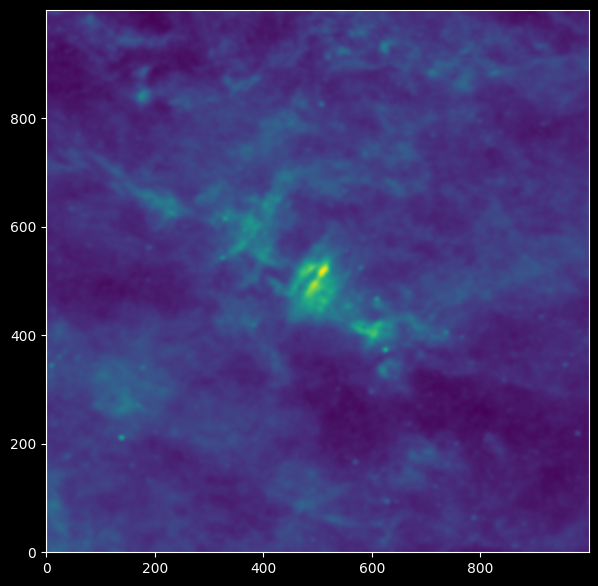

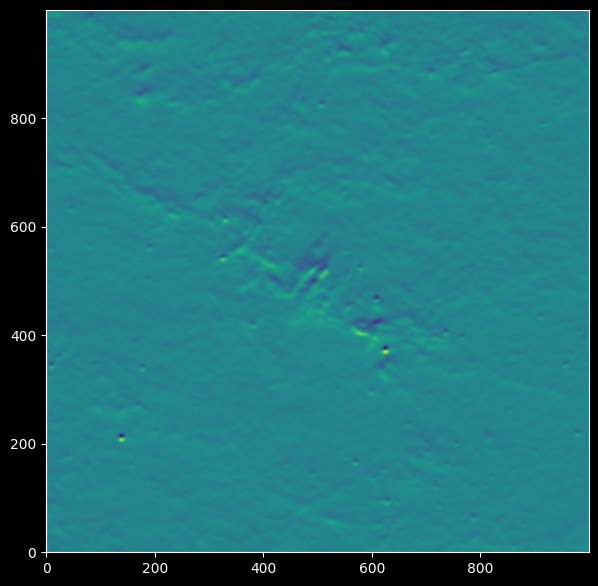

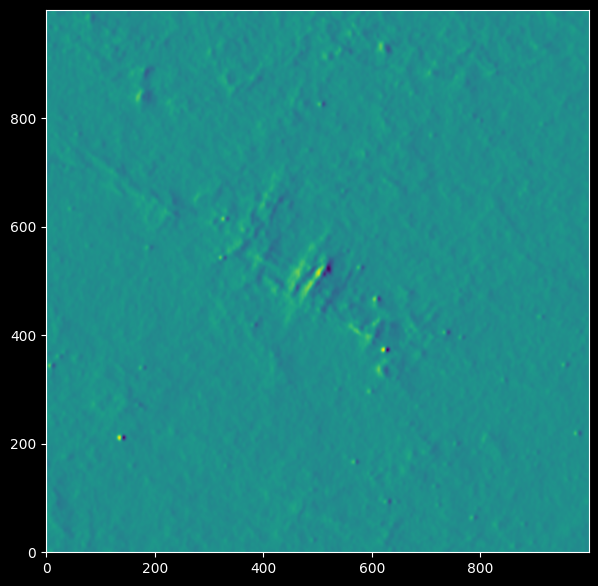

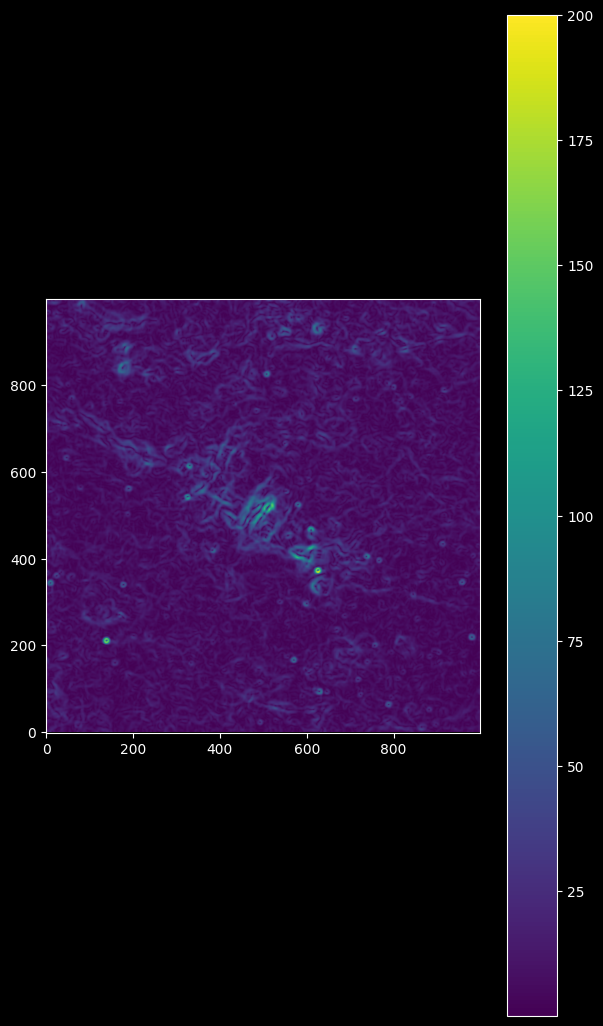

In [4]:
from scipy.ndimage import sobel, gaussian_filter

ir100_gfilt = gaussian_filter(IR100_DATA,sigma=2)

ir100_x = sobel(ir100_gfilt,axis=0)
ir100_y = sobel(ir100_gfilt,axis=1)

ir100_filt = np.sqrt(ir100_x**2 + ir100_y**2)
ir100_filt *= 200/ir100_filt.max()


plt.figure(figsize=(7,13))
plt.imshow(ir100_gfilt,origin='lower')
plt.figure(figsize=(7,13))
plt.imshow(ir100_x,origin='lower')
plt.figure(figsize=(7,13))
plt.imshow(ir100_y,origin='lower')
plt.figure(figsize=(7,13))
plt.imshow(ir100_filt,origin='lower')
plt.colorbar()
plt.show()


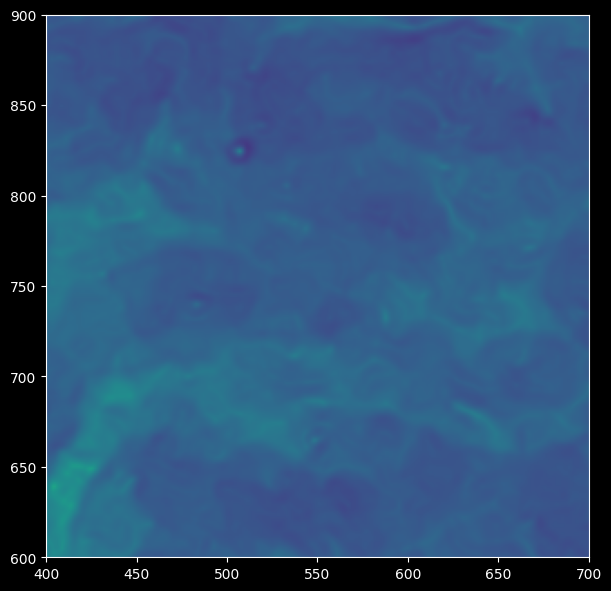

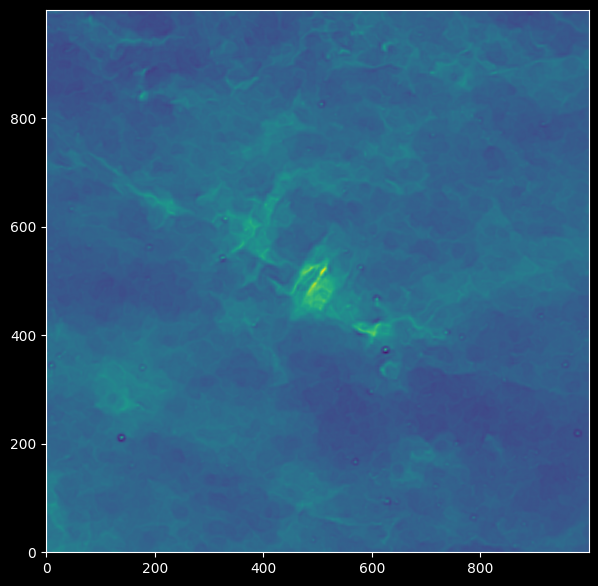

In [5]:
ir100_filt = np.sqrt(ir100_x**2 + ir100_y**2)
plt.figure(figsize=(7,13))
plt.imshow(ir100_gfilt-ir100_filt,origin='lower')
plt.xlim(400,700)
plt.ylim(600,900)
plt.figure(figsize=(7,13))
plt.imshow(IR100_DATA-ir100_filt,origin='lower')
plt.show()

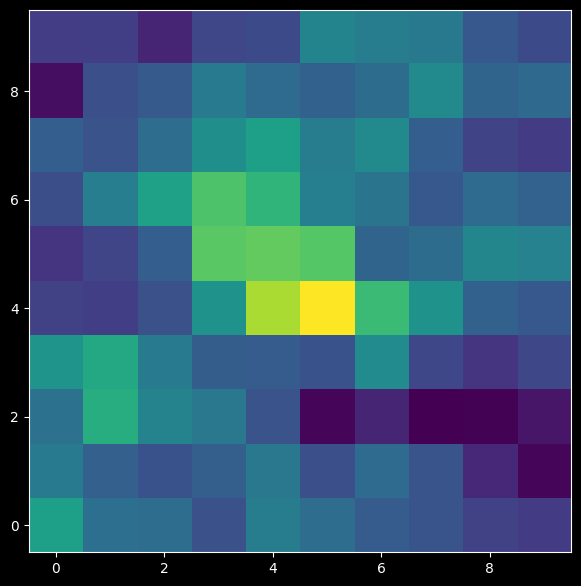

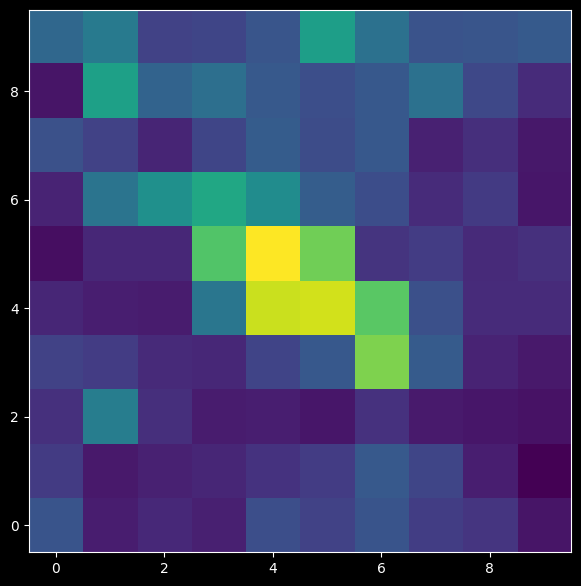

In [6]:
def reducing(image,red_num=3):
    new_image = np.copy(image)
    x_sh, y_sh = new_image.shape
    n_x, n_y = x_sh // red_num, y_sh // red_num
    new_image = np.array([[ np.average(new_image[red_num*x:red_num*(x+1)+1, red_num*y:red_num*(y+1)+1]) for y in range(n_y)] for x in range(n_x)])
    return new_image

red_num = 100
plt.figure(figsize=(7,13))
plt.imshow(reducing(IR100_DATA,red_num=red_num),origin='lower')
plt.figure(figsize=(7,13))
plt.imshow(reducing(ir100_filt,red_num=red_num),origin='lower')

plt.show()